In [68]:
#import
import os
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt

In [69]:
data = pd.read_csv('../data.csv')
data

,id,category,update,media,date,title,title_en,url,translation_en,is_deleted,alternative,archive
0,4902,non_fiction,2020-04-03,中国经营报,2020-04-03,年前裸辞的年轻人 迎来史上最长职业“空窗期”,NaN,https://mp.weixin.qq.com/s/efUrxeAToFqIhx-N789TDg,NaN,NaN,NaN,NaN
1,4901,non_fiction,2020-04-03,中国经营报,2020-04-03,“封国”超过一周，印度单日死亡病例创新高，最大贫民窟首次报告确诊病例,NaN,https://mp.weixin.qq.com/s/1dmGafhXNfpsBPrU8Mv6jw,NaN,NaN,NaN,NaN
2,4900,non_fiction,2020-04-03,新民周刊,2020-2-11,口述 | 湖北省作协主席李修文：我的心是乱的，现在没法写作,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN
3,4899,non_fiction,2020-04-03,新民周刊,2020-2-10,“散装江苏”刷屏的背后，是感动与信心，更是“对口支援”的中国力量,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN
4,4898,non_fiction,2020-04-03,新民周刊,2020-2-10,专访上海市公共卫生临床中心主任朱同玉：返程高峰，上海已准备好了,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN
5,4897,non_fiction,2020-04-03,第一财经YiMagazine,2020-2-6,特别报道 | 她给医院捐了300瓶消毒液，想换一个妈妈的住院资格,NaN,https://mp.weixin.qq.com/s?__biz=MjM5NDAzMjk2M...,NaN,True,https://www.cbnweek.com/articles/theme/24369,https://archive.li/wip/9OlTj
6,4896,non_fiction,2020-04-03,新京报,2020-3-25,武磊新冠病毒检测转阴性，全队6人均获医学解除,NaN,https://mp.weixin.qq.com/s?__biz=MzU2MzA2ODk3N...,NaN,True,NaN,NaN
7,4895,non_fiction,2020-04-03,新京报,2020-3-24,探访上海“洋女婿”居家隔离小区：志愿者称符合规定，无特殊对待,NaN,https://mp.weixin.qq.com/s?__biz=MzU2MzA2ODk3N...,NaN,True,NaN,NaN
8,4894,non_fiction,2020-04-03,新京报,2020-3-15,武汉社区志愿者加价售卖生活物资？官方回应,NaN,https://mp.weixin.qq.com/s?__biz=MzU2MzA2ODk3N...,NaN,True,NaN,NaN
9,4893,non_fiction,2020-04-03,新京报,2020-3-8,博士冒用武大校友会名义募捐，踩了哪些“红线”,NaN,https://mp.weixin.qq.com/s?__biz=MzU2MzA2ODk3N...,NaN,True,NaN,NaN


In [70]:
data.columns

Index(['id', 'category', 'update', 'media', 'date', 'title', 'title_en', 'url',
       'translation_en', 'is_deleted', 'alternative', 'archive'],
      dtype='object')

In [71]:
tr_df = pd.read_csv('2019-nCoV Stories for Translation - Sheet1.csv')
tr_df.columns

Index(['Mandarin Headline', 'English Headline', 'Content Link', 'Archive Link',
       'Status', 'Translator', 'Link to Translation'],
      dtype='object')

In [72]:
tr_df

,Mandarin Headline,English Headline,Content Link,Archive Link,Status,Translator,Link to Translation
0,新型肺炎疫情防控下的武汉生活,Life in Wuhan Under 2019-nCoV Prevention and C...,https://mp.weixin.qq.com/s/cg4qHhta8nLx93PDaW1dHQ,https://web.archive.org/web/20200203023328/htt...,In Progress,NaN,NaN
1,肺炎疫情中的人們,People in a Pneumonia Epidemic,https://mp.weixin.qq.com/s/kUY_Sr3s52pn4jfs8RK60A,https://web.archive.org/save/https://mp.weixin...,Untranslated,NaN,NaN
2,防疫升級後的武漢,Wuhan After Epidemic Prevention Upgrade,https://mp.weixin.qq.com/s/-RmxrJ8VeqzgiBMAGmzYPA,https://web.archive.org/web/20200203023701/htt...,Untranslated,NaN,NaN
3,全國人在吃年夜飯 他們在建「武漢小湯山」,While the Whole Nation Is Having New Year’s Ev...,https://mp.weixin.qq.com/s/BsKYzzw0CH9e-jQTa76iGQ,https://web.archive.org/save/https://mp.weixin...,Untranslated,NaN,NaN
4,中青報記者大年初一探訪武漢市第五醫院,Reporters From China Youth Daily Visit Wuhan N...,https://mp.weixin.qq.com/s/EdIVxRLtkUZPGD_L4pXOBA,https://web.archive.org/save/https://mp.weixin...,Untranslated,NaN,NaN
5,一个湖北村庄的防疫故事：村医穿雨衣当防护服,A Disease Control Story in a Hubei Village: A ...,https://mp.weixin.qq.com/s/Ual8bxKz-IaLOeyCD-DWlw,https://web.archive.org/web/20200203024201/htt...,Translated Pending Edit,Kendra,https://docs.google.com/document/d/1YLixNSTZgC...
6,武汉部分医院仍然“喊渴”,Some Hospitals in Wuhan Are Still “Thirsty” (F...,https://mp.weixin.qq.com/s/willAfAQ6U2igKSOHxHgrg,https://web.archive.org/save/https://mp.weixin...,Untranslated,NaN,NaN
7,三個年輕人和100萬隻口罩,Three Young People and One Million Masks,https://mp.weixin.qq.com/s/2lopW3OCS2FIK4KSaZBY-w,https://web.archive.org/save/https://mp.weixin...,Untranslated,NaN,NaN
8,钟南山发话前，武汉这位医生向附近学校发出疫情警报,"Before Zhong Nanshan Spoke, This Doctor in Wuh...",https://mp.weixin.qq.com/s/IzzCnz4Yr2jEIYZePiu_ow,https://web.archive.org/save/https://mp.weixin...,Untranslated,NaN,NaN
9,武汉新型肺炎：为何直到今天才引起更大注意？,Wuhan Novel Pneumonia: Why No Attention Until ...,https://mp.weixin.qq.com/s/xuf8nn1OPOY51cyZMduQ-Q,https://web.archive.org/web/20200127134219/htt...,Untranslated,NaN,NaN


In [73]:
newdf = pd.merge(data,tr_df,left_on = 'title', right_on = 'Mandarin Headline',how="outer")
newdf.to_csv (r'merge.csv', index = False, header=True) #saving dataframe

In [74]:
newdf.head()

,id,category,update,media,date,title,title_en,url,translation_en,is_deleted,alternative,archive,Mandarin Headline,English Headline,Content Link,Archive Link,Status,Translator,Link to Translation
0,4902.0,non_fiction,2020-04-03,中国经营报,2020-04-03,年前裸辞的年轻人 迎来史上最长职业“空窗期”,NaN,https://mp.weixin.qq.com/s/efUrxeAToFqIhx-N789TDg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4901.0,non_fiction,2020-04-03,中国经营报,2020-04-03,“封国”超过一周，印度单日死亡病例创新高，最大贫民窟首次报告确诊病例,NaN,https://mp.weixin.qq.com/s/1dmGafhXNfpsBPrU8Mv6jw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4900.0,non_fiction,2020-04-03,新民周刊,2020-2-11,口述 | 湖北省作协主席李修文：我的心是乱的，现在没法写作,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,784.0,non_fiction,2020-02-11,新民周刊,2020-02-11,口述 | 湖北省作协主席李修文：我的心是乱的，现在没法写作,NaN,https://mp.weixin.qq.com/s/8Lx6M3qAzC8w35GEqyi6Og,NaN,True,NaN,http://archive.is/C4wpi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4899.0,non_fiction,2020-04-03,新民周刊,2020-2-10,“散装江苏”刷屏的背后，是感动与信心，更是“对口支援”的中国力量,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
newdf2 = pd.merge(data,tr_df, left_on = 'title', right_on = 'Mandarin Headline', how="left")
newdf2.head()

,id,category,update,media,date,title,title_en,url,translation_en,is_deleted,alternative,archive,Mandarin Headline,English Headline,Content Link,Archive Link,Status,Translator,Link to Translation
0,4902,non_fiction,2020-04-03,中国经营报,2020-04-03,年前裸辞的年轻人 迎来史上最长职业“空窗期”,NaN,https://mp.weixin.qq.com/s/efUrxeAToFqIhx-N789TDg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4901,non_fiction,2020-04-03,中国经营报,2020-04-03,“封国”超过一周，印度单日死亡病例创新高，最大贫民窟首次报告确诊病例,NaN,https://mp.weixin.qq.com/s/1dmGafhXNfpsBPrU8Mv6jw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4900,non_fiction,2020-04-03,新民周刊,2020-2-11,口述 | 湖北省作协主席李修文：我的心是乱的，现在没法写作,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4899,non_fiction,2020-04-03,新民周刊,2020-2-10,“散装江苏”刷屏的背后，是感动与信心，更是“对口支援”的中国力量,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4898,non_fiction,2020-04-03,新民周刊,2020-2-10,专访上海市公共卫生临床中心主任朱同玉：返程高峰，上海已准备好了,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
newdf2.columns

Index(['id', 'category', 'update', 'media', 'date', 'title', 'title_en', 'url',
       'translation_en', 'is_deleted', 'alternative', 'archive',
       'Mandarin Headline', 'English Headline', 'Content Link', 'Archive Link',
       'Status', 'Translator', 'Link to Translation'],
      dtype='object')

We are going to delete some columns: 'Mandarin Headline','Content Link' and Archive Link' are duplicates; 'Translator' and 'Link to Translation' are empty in left join; 'Status' does not bring any meaningful information for us as it is mostly indicated untranslated on some column. Basically, we only want to keep the english translation of 'English Headline'. We are keeping title_en because the translation might be different on the few translation of data.csv (original dataframe)

In [77]:
newdf2 = newdf2.drop(['Mandarin Headline', 'Content Link', 'Archive Link','Status', 'Translator', 'Link to Translation'],axis = 1)

Then we are moving 'English Headline' next to 'title_en' if there are any comparison to make

In [78]:
newdf2 = newdf2[['id', 'category', 'update', 'media', 'date', 'title', 'title_en','English Headline', 'url',
       'translation_en', 'is_deleted', 'alternative', 'archive',]]

In [79]:
newdf2.head()

,id,category,update,media,date,title,title_en,English Headline,url,translation_en,is_deleted,alternative,archive
0,4902,non_fiction,2020-04-03,中国经营报,2020-04-03,年前裸辞的年轻人 迎来史上最长职业“空窗期”,NaN,NaN,https://mp.weixin.qq.com/s/efUrxeAToFqIhx-N789TDg,NaN,NaN,NaN,NaN
1,4901,non_fiction,2020-04-03,中国经营报,2020-04-03,“封国”超过一周，印度单日死亡病例创新高，最大贫民窟首次报告确诊病例,NaN,NaN,https://mp.weixin.qq.com/s/1dmGafhXNfpsBPrU8Mv6jw,NaN,NaN,NaN,NaN
2,4900,non_fiction,2020-04-03,新民周刊,2020-2-11,口述 | 湖北省作协主席李修文：我的心是乱的，现在没法写作,NaN,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN
3,4899,non_fiction,2020-04-03,新民周刊,2020-2-10,“散装江苏”刷屏的背后，是感动与信心，更是“对口支援”的中国力量,NaN,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN
4,4898,non_fiction,2020-04-03,新民周刊,2020-2-10,专访上海市公共卫生临床中心主任朱同玉：返程高峰，上海已准备好了,NaN,NaN,https://mp.weixin.qq.com/s?__biz=MTUzMDQzNjMwM...,NaN,True,NaN,NaN


In [80]:
#newdf2.to_csv (r'data_with_en.csv', index = False, header=True) #saving dataframe

And since we want to compare english titles we can select the the rows which actually contain something

In [81]:
newdf3 = newdf2.dropna(subset=['title_en','English Headline'], how='all')

In [82]:
newdf3.reset_index(drop=True)

,id,category,update,media,date,title,title_en,English Headline,url,translation_en,is_deleted,alternative,archive
0,3281,non_fiction,2020-03-11,财新网,2020-03-09,武汉新型冠状病毒肺炎大事记（2020年1月21日—今）,NaN,Major Events in the Wuhan New Coronavirus Pneu...,http://www.caixin.com/2020-03-09/101506971.html,NaN,NaN,NaN,http://archive.ph/Yv0gG
1,715,non_fiction,2020-02-10,人物/每日人物,2020-02-10,「千奇百怪的出警，都跟新冠肺炎有关」,Police call-outs to the field for thousands of...,NaN,https://mp.weixin.qq.com/s/KbFax4bUb8SYZn5v7QY9Jw,https://github.com/memoryhonest/nCovMemory-en/...,NaN,NaN,http://archive.ph/MZyVe
2,376,non_fiction,2020-02-07,人物/每日人物,2020-02-07,普通人李文亮,Li Wenliang: An ordinary person,NaN,https://mp.weixin.qq.com/s/I1J3wCbfbMP7AecP1_Ie2A,https://github.com/memoryhonest/nCovMemory-en/...,NaN,NaN,http://archive.is/nDykY
3,359,non_fiction,2020-02-06,北青深一度,2020-02-02,一个武汉红十字会志愿者的自述,NaN,Verbal Account From a Wuhan Red Cross Volunteer,https://mp.weixin.qq.com/s/f-5AC4hP2M06Va48CsLRxQ,NaN,NaN,NaN,https://archive.ph/fc7Td
4,358,non_fiction,2020-02-06,北青深一度,2020-02-01,新冠病毒出现多例“两阴后变阳”病例，专家称临床不应轻易排除,NaN,Multiple Patients Tested 2019-nCoV Negative Be...,https://mp.weixin.qq.com/s/ROO6IRPYUHHnJzHnCR88sQ,NaN,NaN,NaN,https://archive.ph/HF5xY
5,357,non_fiction,2020-02-06,北青深一度,2020-01-29,武汉城外的重负：地县乡三级抗疫遭遇的百万返乡潮,NaN,Burden Outside of Wuhan: The Millions Returnin...,https://mp.weixin.qq.com/s/o36treeC6mAJSzd92bKLZQ,NaN,NaN,NaN,https://archive.ph/oDYjA
6,356,non_fiction,2020-02-06,北青深一度,2020-01-28,“中国顶级SARS病房”专家童朝晖：目前重症患者没有减少趋势，核酸检测已引入第三方,NaN,"Tong Chaohui, the Expert From China’s Top SARS...",https://mp.weixin.qq.com/s/NBdAjSF8WAYYuSq9d2hYYA,NaN,NaN,NaN,https://archive.ph/O9IsU
7,355,non_fiction,2020-02-06,北青深一度,2020-01-28,武汉街头的“摆渡人”：每分钟处理1000条信息，不是不怕感染，停了医护人员怎么上班,NaN,Volunteer Drivers in Wuhan: They Receive 1000 ...,https://mp.weixin.qq.com/s/fUtAhkgUZvpLHEAvX6O-Tg,NaN,NaN,NaN,https://archive.ph/cze3f
8,353,non_fiction,2020-02-06,北青深一度,2020-01-26,自我隔离的抗疫医生：没人去坐市民的爱心车，骂跑要来陪的女朋友,NaN,Doctor Under Self-Quarantine: No Doctor Took a...,https://mp.weixin.qq.com/s/iq3iNFpnqchhr1_dZDv8HA,NaN,NaN,NaN,https://archive.ph/otPCi
9,352,non_fiction,2020-02-06,北青深一度,2020-01-25,武汉除夕故事：照顾发烧的丈夫，妻子穿上一次性塑料雨衣,NaN,Wuhan New Year’s Eve Story: Wife Dons Disposab...,https://mp.weixin.qq.com/s/9vU-JV6adRw62muBydqT0Q,NaN,NaN,NaN,https://archive.ph/1AHJN


In [83]:
#newdf3.to_csv (r'translated_titles.csv', index = False, header=True) #saving dataframe

Now let's move to something slightly more complicated and let's see if we can merge our own excel sheet  with data regarding the type of media.

In [84]:
handmade = pd.read_excel('5table_media_nCov_handmade.xlsx')
handmade.columns

Index(['Title', 'Date', 'Author', 'Media', 'media category',
       'Details on media category', 'Theme of Media',
       'Media name in english/french', 'Place of publication',
       'Place of action/second location', 'category', 'Thème de l'article',
       'url d'origine', 'remarques', 'is_deleted',
       'Problèmes techniques première publication/ censure',
       'remarques problèmes techniques', 'alternative', 'archive', 'update',
       'title_en', 'translation_en'],
      dtype='object')

In [85]:
handmade2 = handmade[['Title', 'Author', 'Media', 'media category','Details on media category', 'Theme of Media','Media name in english/french', 'Place of publication','Place of action/second location','remarques']]

In [86]:
madedata= pd.merge(data,handmade2,left_on = 'media', right_on = 'Media', how = 'outer')
madedata.head()

,id,category,update,media,date,title,title_en,url,translation_en,is_deleted,...,Title,Author,Media,media category,Details on media category,Theme of Media,Media name in english/french,Place of publication,Place of action/second location,remarques
0,4902,non_fiction,2020-04-03,中国经营报,2020-04-03,年前裸辞的年轻人 迎来史上最长职业“空窗期”,NaN,https://mp.weixin.qq.com/s/efUrxeAToFqIhx-N789TDg,NaN,NaN,...,西班牙告急！新冠肺炎死亡病例数全球第二，溜冰场被改为停尸房,NaN,中国经营报,newspaper,weekly,business,China Business Journal,Beijing,NaN,baidu: https://baike.baidu.com/item/%E4%B8%AD%...
1,4901,non_fiction,2020-04-03,中国经营报,2020-04-03,“封国”超过一周，印度单日死亡病例创新高，最大贫民窟首次报告确诊病例,NaN,https://mp.weixin.qq.com/s/1dmGafhXNfpsBPrU8Mv6jw,NaN,NaN,...,西班牙告急！新冠肺炎死亡病例数全球第二，溜冰场被改为停尸房,NaN,中国经营报,newspaper,weekly,business,China Business Journal,Beijing,NaN,baidu: https://baike.baidu.com/item/%E4%B8%AD%...
2,4880,non_fiction,2020-04-03,中国经营报,2020-04-02,从大萧条到新冠肺炎，消费券真的能够提振经济吗？,NaN,https://mp.weixin.qq.com/s/1fdhpAFlXCdg2RPOCZgSNg,NaN,NaN,...,西班牙告急！新冠肺炎死亡病例数全球第二，溜冰场被改为停尸房,NaN,中国经营报,newspaper,weekly,business,China Business Journal,Beijing,NaN,baidu: https://baike.baidu.com/item/%E4%B8%AD%...
3,4879,non_fiction,2020-04-03,中国经营报,2020-04-02,民办幼儿园“新冠考验”：抵押桌椅借钱发工资 多数不敢真裁员,NaN,https://mp.weixin.qq.com/s/xrIwZr04vRj1b9ascvpHOw,NaN,NaN,...,西班牙告急！新冠肺炎死亡病例数全球第二，溜冰场被改为停尸房,NaN,中国经营报,newspaper,weekly,business,China Business Journal,Beijing,NaN,baidu: https://baike.baidu.com/item/%E4%B8%AD%...
4,4878,non_fiction,2020-04-03,中国经营报,2020-04-02,142万名留学生尚在国外，36人确诊，健康包等已安排上！,NaN,https://mp.weixin.qq.com/s/yFlGHqX7gwBO-GjqN_ZFqg,NaN,NaN,...,西班牙告急！新冠肺炎死亡病例数全球第二，溜冰场被改为停尸房,NaN,中国经营报,newspaper,weekly,business,China Business Journal,Beijing,NaN,baidu: https://baike.baidu.com/item/%E4%B8%AD%...


In [87]:
madedata.columns

Index(['id', 'category', 'update', 'media', 'date', 'title', 'title_en', 'url',
       'translation_en', 'is_deleted', 'alternative', 'archive', 'Title',
       'Author', 'Media', 'media category', 'Details on media category',
       'Theme of Media', 'Media name in english/french',
       'Place of publication', 'Place of action/second location', 'remarques'],
      dtype='object')

In [88]:
madedata['media category'].str.strip

<bound method StringMethods.strip of <pandas.core.strings.StringMethods object at 0x7f9101bb9cc0>>

In [89]:
#madedata.to_csv (r'data_merge_handmade.csv', index = False, header=True) #saving dataframe

let's make a quick graphic with the media type

In [90]:
z = madedata['media category'].value_counts().sort_values(ascending = False).reset_index()
z.rename(columns = {'index':'media type', 'media category': 'freq'}, inplace = True)

In [91]:
z

,media type,freq
0,newspaper,2446
1,platform,805
2,blogger,560
3,online media,536
4,writer,115
5,magazine,77
6,actress,77
7,tech conglomerate,52
8,website for gamers,39
9,university,35


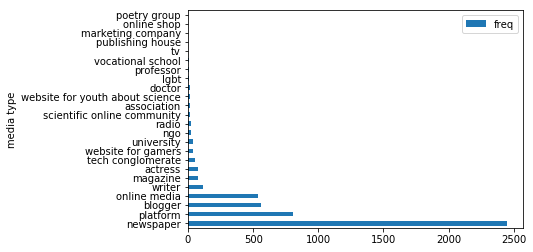

In [92]:
z.plot.barh(x = 'media type', y = 'freq')

In [93]:
z.freq.sum()

4881

In [94]:
lieux = madedata['Place of publication'].value_counts().sort_values(ascending = False).reset_index()
lieux.rename(columns = {'index':'place of publication', 'Place of publication': 'freq'}, inplace = True)

In [95]:
lieux

,place of publication,freq
0,Beijing,2168
1,Shanghai,1485
2,Wuhan,347
3,Guangzhou,268
4,Hubei Province,119
5,Shenzhen,74
6,Tianjin,66
7,Hangzhou,63
8,Zhejiang,44
9,Jiangsu Province,31


In [96]:
#lieux.to_csv (r'place_of_publication.csv', index = True, header=True) #saving dataframe

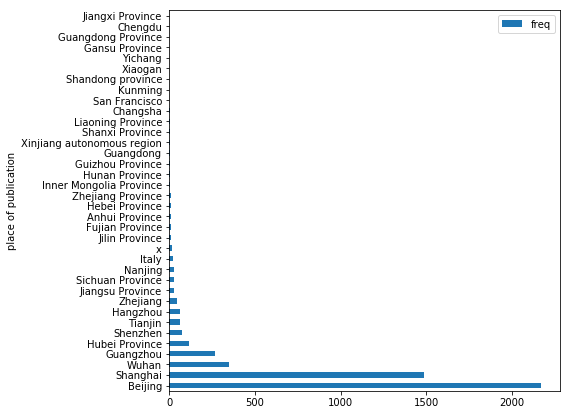

In [97]:
lgraph = lieux.plot.barh(x = 'place of publication', y = 'freq',figsize =(7,7))

The bar plot is not so nice. Let's try to see that on a map.

In [98]:
from geopy.geocoders import Nominatim

In [99]:
address='Inner Mongolia'
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))

内蒙古自治区, 中国
(43.2443242, 114.3251664)


In [100]:
geolocator.geocode('Jiangxi')

Location(江西省, 中国, (28.0, 116.0, 0.0))

In [101]:
def ex_lat(address):
    location = geolocator.geocode(address)
    return location.latitude
    

In [102]:
def ex_long(address):
    location = geolocator.geocode(address)
    return location.longitude

I'm having a few problems with the functions, nominatim cannot find some location and returns an error. We are going to remove "Province" from the province name and see if that helps.
That is something that is necessary as well later, since "Province" also modifiy the location.

In [103]:
lieux['p'] = lieux['place of publication'].apply(lambda x: x.split()[0])
lieux

,place of publication,freq,p
0,Beijing,2168,Beijing
1,Shanghai,1485,Shanghai
2,Wuhan,347,Wuhan
3,Guangzhou,268,Guangzhou
4,Hubei Province,119,Hubei
5,Shenzhen,74,Shenzhen
6,Tianjin,66,Tianjin
7,Hangzhou,63,Hangzhou
8,Zhejiang,44,Zhejiang
9,Jiangsu Province,31,Jiangsu


That is quite good only Inner Mongolia and San Francisco is not working very well. I did not catch it at first.

In [104]:
lieux.at[19, 'p'] = 'Inner Mongolia'
lieux.at[27, 'p'] = 'San Francisco'
lieux

,place of publication,freq,p
0,Beijing,2168,Beijing
1,Shanghai,1485,Shanghai
2,Wuhan,347,Wuhan
3,Guangzhou,268,Guangzhou
4,Hubei Province,119,Hubei
5,Shenzhen,74,Shenzhen
6,Tianjin,66,Tianjin
7,Hangzhou,63,Hangzhou
8,Zhejiang,44,Zhejiang
9,Jiangsu Province,31,Jiangsu


In [105]:
lieux['lat'] = lieux['p'].apply(ex_lat)

In [106]:
lieux['long'] = lieux['p'].apply(ex_long)

In [107]:
lieux

,place of publication,freq,p,lat,long
0,Beijing,2168,Beijing,39.906217,116.391276
1,Shanghai,1485,Shanghai,31.232276,121.469207
2,Wuhan,347,Wuhan,30.595105,114.299935
3,Guangzhou,268,Guangzhou,23.130196,113.259294
4,Hubei Province,119,Hubei,31.151725,112.878322
5,Shenzhen,74,Shenzhen,22.555454,114.054330
6,Tianjin,66,Tianjin,39.085673,117.195107
7,Hangzhou,63,Hangzhou,30.248963,120.205234
8,Zhejiang,44,Zhejiang,29.000000,120.000000
9,Jiangsu Province,31,Jiangsu,33.000000,120.000000


preparing the map

In [108]:
# import the library
import folium

In [109]:
# Make an empty map
m = folium.Map(location=[32.0609736, 118.7916458], tiles="OpenStreetMap", zoom_start=4)

# Show the map
m

In [110]:
# add marker one by one on the map
for i in range(0,len(lieux)):
   folium.Circle(
      location=[lieux.iloc[i]['lat'], lieux.iloc[i]['long']],
      popup=lieux.iloc[i]['place of publication'],
      radius=float(lieux.iloc[i]['freq'])*200,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)


In [111]:
#lieux.drop(lieux.tail(1).index,inplace=True)

Drop the unknown location since it creates the illusion of a presence in Argentina

In [112]:
lieux = lieux.drop(13)

Let's add the frequency to the popup, and make it easy to read by adding a new column with commas.

In [113]:
def coupe(number):
    x = "{:,}".format(number)
    return x

In [114]:
lieux['freq2'] = lieux.freq.apply(coupe)
lieux

,place of publication,freq,p,lat,long,freq2
0,Beijing,2168,Beijing,39.906217,116.391276,"2,168"
1,Shanghai,1485,Shanghai,31.232276,121.469207,"1,485"
2,Wuhan,347,Wuhan,30.595105,114.299935,347
3,Guangzhou,268,Guangzhou,23.130196,113.259294,268
4,Hubei Province,119,Hubei,31.151725,112.878322,119
5,Shenzhen,74,Shenzhen,22.555454,114.054330,74
6,Tianjin,66,Tianjin,39.085673,117.195107,66
7,Hangzhou,63,Hangzhou,30.248963,120.205234,63
8,Zhejiang,44,Zhejiang,29.000000,120.000000,44
9,Jiangsu Province,31,Jiangsu,33.000000,120.000000,31


In [115]:
# Reset the map
m = folium.Map(location=[32.0609736, 118.7916458], tiles="OpenStreetMap", zoom_start=4)

#add a title
title = "Number of articles per publication's places"
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)   
m.get_root().html.add_child(folium.Element(title_html))

#write again the circles with the changes made
for places, freq, lat, long, freq2 in zip(
    lieux.p, 
    lieux.freq, 
    lieux.lat,
    lieux.long,
    lieux.freq2):
    
    label= '{}: {}'.format(places, freq2) # Define label here to reuse after
    
    m.add_child(
        folium.Circle(
            [lat,long],
            label = label,
            popup = label,
            radius = float(freq)*200, # define how big is the circle
            color = 'crimson',
            fill = True,
            fill_color = 'crimson',
            fill_opacity = 0.3
        ).add_to(m)
    )

In [116]:
m

In [117]:
#save the map
m.save("maps/freq_places_of_publication.html")

et voilà